In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LinearRegression


import starmaptools.classes as smt

# Testing reading speed on entire DB

In [2]:
limits = [1e+3, 10e+3, 25e+3, 50e+3, 75e+3, 100e+3, 250e+3, 500e+3, 750e+3, 1e+6]

In [3]:
times = []
for l in limits:
    start = time.perf_counter()
    data = smt.Systems().all(limit=int(l))
    end = time.perf_counter()
    times.append(end-start)

<Axes: xlabel='limits'>

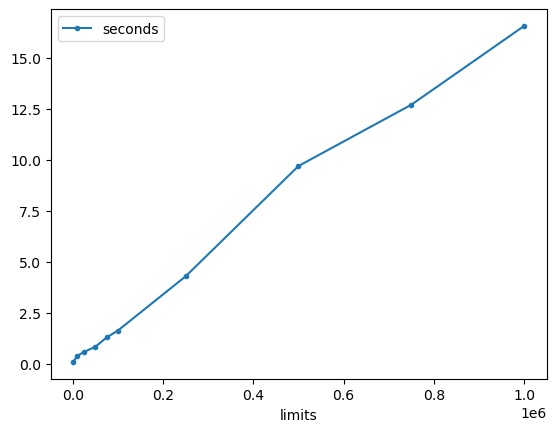

In [4]:
data = pd.DataFrame(data={'limits':limits, 'seconds':times})
data.plot.line(x='limits', y='seconds', style=".-")

In [5]:
systems_count = smt.SQLQuery(query="SELECT COUNT(*)").iloc[0,0]

model = LinearRegression()
x=np.array(limits).reshape(-1,1)
y=np.array(times)

model.fit(x, y)

r2_score = model.score(x, y)
print(f"R-squared value: {r2_score}")

test = np.array([systems_count]).reshape(-1,1)
prediction = model.predict(test)

print("Linear Regression predicts {s:.2f} minutes to import {c:,} records".format(s=prediction.tolist()[0]/60, c=systems_count))

R-squared value: 0.9951877824766002
Linear Regression predicts 8.57 minutes to import 30,492,549 records


<Axes: xlabel='limits'>

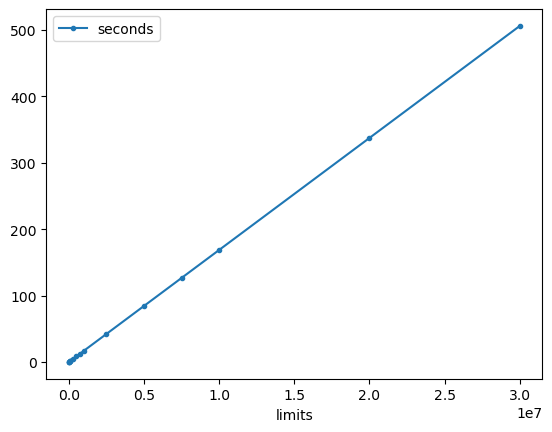

In [6]:
test = [1e+3, 10e+3, 25e+3, 50e+3, 75e+3, 100e+3, 250e+3, 500e+3, 750e+3, 1e+6, 25e+5, 5e+6, 75e+5, 10e+6, 20e+6, 30e+6]
test_y = np.array(test).reshape(-1,1)
prediction = model.predict(test_y)
data = pd.DataFrame(data={'limits':test, 'seconds':prediction.tolist()})
data.plot.line(x='limits', y='seconds', style=".-")

> Prediction is terrible !

## Chunking test

In [7]:
limits = [0, 1e+3, 10e+3, 25e+3, 50e+3, 75e+3, 100e+3, 200e+3]
times = []

s = time.perf_counter()
data = smt.Systems().all(limit=int(200e+3))
e = time.perf_counter()
times.append(e-s)

for l in range(len(limits)-1):
    start = time.perf_counter()
    data = smt.Systems().all(limit=int(200e+3), chunksize=int(limits[l+1]))
    end = time.perf_counter()
    times.append(end-start)

<Axes: xlabel='chunks'>

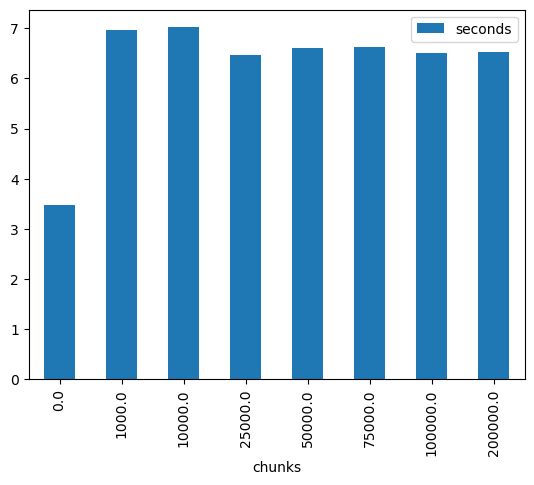

In [8]:
data = pd.DataFrame(data={'chunks':limits, 'seconds':times})
data.plot.bar(x='chunks', y='seconds')

> Chunking makes it so much worst.

# Caching

In [9]:
# smt.Engine().create_cache(dataframe=data, path="./test_cache.pkl")

In [10]:
# data = pd.read_pickle('test_cache.pkl')
# data